# Binary Classification with Support Vector Machines

This tutorial attempts to explain the concept of Support Vector Machines (SVMs) using a combination of theory and application. The first section provides a theoretical background and a mathematical overview of SVMs. The second section demonstrates the use of SVM through a simple linear example as well as a more complex non-linear application.

## 1.0 Theory and Background

### 1.1 Introduction to SVM

In this tutorial, we will attempt to understand binary classification using a machine learning algorithm known as Support Vector Machine (SVM). Binary classification refers to classifying data into two classses or labels, typically expressed as $\{+1,-1\}$. This means that the outcome of our machine learning algorithm will be one of two possibilities. SVM works by creating a hyperplane that seperates the data. In the case of binary classification, the SVM seperates the data into two classes that best represent the data. So when training this classifier, we need to ensure that the examples with **positive labels** are on the **positive** side of the plane, and examples with **negative labels** are on the **negative** side of the hyperplane:

$$
\tag{1}
\left\langle{w}, {x}_{n}\right\rangle+ b \geqslant 0 \quad \text { when } \quad y_{n}=+1
$$

$$
\tag{2}
\left\langle{w}, {x}_{n}\right\rangle+ b<0 \quad \text { when } \quad y_{n}=-1
$$

where $x_n$ and $y_n$ refers to the input and label of the $n^{th}$ sample respectively, $w$ refers to the weights or parameters of the hyperplane, and $b$ refers to the intercept.

The main objective of an SVM is to find a hyperplane that best seperates the data. To do this mathematically, we define a concept called **margin**, which refers to the distance between the hyperplane and the closest examples in the dataset, known as ***support vectors***. Below is a visualization of this taken from a very useful tutorial on SVM by Dr. Saed Sayad [1]. This picture shows how data with two labels, represented by the colors green and red, are seperated based on their features, $X_1$ and $X_2$ using a hyperplane between the support vectors.

![SVM_1](https://user-images.githubusercontent.com/55256265/66949986-80fc8600-f025-11e9-8eef-3e225076d5cb.png)

For our SVM classifier to be successful, we want our examples to be at least distance *r* from our hyperplane. In other words, our **positive** examples, with label of +1, would be distance *r* away from the hyperplane in the **positive direction**, and our **negative** examples, labeled -1, would be distance *r* away from the hyperplane in the **negative direction**. This objective can be formulated as:

$$
\tag{3}
y_{n}\left(\left\langle{w}, {x}_{n}\right\rangle+ b\right) \geqslant r
$$

Since the direction of the data is our main interest, we add the assumption that the parameter vector $w$ is of unit length when utlizing the *Euclidean norm*:

$$
\tag{4}
\|{w}\|=\sqrt{{w}^{\top} {w}} = 1
$$

With the above assumption, we can think of distance $r$ as a scaling factor of a vector of length 1. Collecting this into a single optimization objective we obtain:

$$
\tag{5}
\begin{array}{cl}{\max _{{w}, b,{r}}} & {\underbrace{r}_{\text {margin }}} \\ {\text { subject to }} & {\underbrace{y_{n}\left(\left\langle{w},{x}_{n}\right\rangle+ b\right) \geqslant r}_{\text {data fitting }}, \underbrace{\|{w}\|=1}_{\text {normalization }}, \quad r>0}\end{array}
$$

which aims to maximize the margin $r$ while ensuring that the training data is on the correct side of the hyperplane and the parameter vector is normalized. Based on the above equation, we can see that training an SVM is merely an optimization problem! However, the above representation is not the common representation of an SVM training algorithm. To obtain the commonly used representation, we consider example $x_a$ which has an orthogonal projection onto the hyperplane, denoted by the vector ${x}_{a}^{\prime}$. Mathematically, we can represent our sample $x_a$ by the following equation:

$$
\tag{6}
{x}_{a}={x}_{a}^{\prime}+r \frac{{w}}{\|{w}\|}
$$

Since ${x}_{a}^{\prime}$ is the orthogonal projection of $x_a$ onto the hyperplane, it must lie on the hyperplane. Mathematically, this is represented by:

$$
\tag{7}
\left\langle{w},{x}_{a}^{\prime}\right\rangle+ b=0
$$

By substituting $6$ into $7$, we obtain:

$$
\tag{8}
\left\langle{w},{x}_{a}-r \frac{{w}}{\|{w}\|}\right\rangle+ b=0
$$

Since the inner product is bilinear, we can simplify the above equation to:

$$
\tag{9}
\left\langle{w},{x}_{a}\right\rangle+ b-r \frac{\langle{w}, {w}\rangle}{\|{w}\|}=0
$$

If we scale our axes so example $x_a$ lies on the margin and is orthogonal to our hyperplane, we can make the following mathematical observation:

$$
\tag{10}
\left\langle{w}, {x}_{a}^{\prime}\right\rangle+ b=0
$$

We also know, from the rules of the inner product, that $\langle{w}, {w}\rangle=\|{w}\|^{2}$. This, along with the subtitution of 10 into 9, results in the following identity:

$$
\tag{11}
r=\frac{1}{\|{w}\|}
$$

Using the above identity, we can simplify $5$ as follows:

$$
\tag{12}
\begin{array}{l}{\max _{{w}, b} \frac{1}{\|{w}\|}} \\ {\text { subject to } y_{n}\left(\left\langle{w}, {x}_{n}\right\rangle+ b\right) \geqslant 1 \quad \text { for all } \quad n=1, \ldots, N}\end{array}
$$

Instead of maximizing the reciprocal of the norm, the usual notation is to minimize the squared norm, which results in the same thing! This notation is a convex quadratic programming problem. A constant of $\frac{1}{2}$ is also included to yield a tidier form when computing the gradient. This makes our objective function as follows:

$$
\tag{13}
\begin{array}{l}{\min _{{w}, b} \frac{1}{2}\|{w}\|^{2}} \\ {\text { subject to } y_{n}\left(\left\langle{w}, {x}_{n}\right\rangle+ b\right) \geqslant 1 \quad \text { for all } \quad n=1, \ldots, N}\end{array}
$$

This expression in $13$ is known as the **Hard Margin SVM** because its formulation does not allow for any violation of the margin conditions. In other words, this forumation assumes that the data is linearly sperable, which is often not the case in real world applications. This issue is solved by what's known as *Soft Margin SVM*, which "softens" the constraints on the margin to allow some examples to fall within the margin region. While this may seem problematic to our classification accuracy, it is merely the price of having data that is not linearly seperable!

### 1.2 Soft Margin SVM

In cases where data is not linearly seperable, which is the case in a lot of real-world applications, we have to allow some of our examples to fall within the margin region or even on the wrong side of the hyperplane. This model, that allows for some classification error, is known as a **Soft Margin SVM**. To do this, we introduce a slack variable, $\xi_{n}$, corresponding to each example-label pair $(x_n,y_n)$ that allows a particular example to be within the margin or on the wrong side of the hyperplane. Adding this slack variable to our objective function yields:

$$
\tag{14}
\begin{array}{cl}{\min _{{w}, b,{\xi}}} & {\frac{1}{2}\|{w}\|^{2}+C \sum_{n=1}^{N} \xi_{n}} \\ {\text { subject to }} & {y_{n}\left(\left\langle{w}, {x}_{n}\right\rangle+ b\right) \geqslant 1-\xi_{n}} \\ {} & {\xi_{n} \geqslant 0}\end{array}
$$

for $n = 1, ... , N$.

The parameter $C > 0$ is known as the *regularization parameter* which decides the trade off between the size of the margin and the amount of slack we have. In other words, the $C$ value determines the influence of misclassification on the objective function. A large $C$ value will prompt the choice of a smaller-margin hyperplane (as long as the data is being classified correctly) while a smaller $C$ value will prompt the choice of a larger-margin hyperplane even if that hyperplane missclassifies some of the samples. Below is another useful visualization of this taken from [1].

![SVM_2](https://user-images.githubusercontent.com/55256265/66952435-a049e200-f02a-11e9-8e7c-5460c49be7f7.png)

#### 1.2.1 Loss function Perspective

A better way to formulate the optimization function of the SVM is through considering a loss function approach. The loss function describes the error that is made on the training data. The common loss function used for SVM is known as **hinge loss** which is formulated as follows:

$$
\tag{15}
\ell(t)=\max \{0,1-t\}
$$

Using this hinge loss function allows us to formulate an unconstrained optimization problem for SVM as follows:

$$
\tag{16}
\min _{{w}, b} \underbrace{\frac{1}{2}\|{w}\|^{2}}_{\text {regularizer }}+\underbrace{C \sum_{n=1}^{N} \max \left\{0,1-y_{n}\left(\left\langle{w}, {x}_{n}\right\rangle+ b\right)\right\}}_{\text {error term }}
$$

In principle, this optimization problem can be solved with methods similar to gradient descent. However, in practice, SVM is formulated using the concept of duality explained in the next section.

### 1.3 Dual SVM

An alternative way of viewing SVM is using the *dual view*, also referred to as **dual SVM**. The main benefits of the dual SVM is its independence of the number of features as well as its compatibility with kernels, which will be discussed in the next section. To represent the dual SVM, we consider the Lagnrange multipliers for the two constraints in the soft margin svm in $14$. We use the Lagrange multiplier $\alpha_{n} \geqslant 0$ corresponding to the constraint that examples are correctly classified, $y_{n}\left(\left\langle\boldsymbol{w}, \boldsymbol{x}_{n}\right\rangle+ b\right) \geqslant 1-\xi_{n}$, and $\gamma_{n} \geqslant 0$ to represent the non-negativity constraint, $\xi_{n} \geqslant 0$.


$$
\begin{aligned} \mathfrak{L}(\boldsymbol{w}, b, \xi, \alpha, \gamma)=& \frac{1}{2}\|\boldsymbol{w}\|^{2}+C \sum_{n=1}^{N} \xi_{n} \\ &-\sum_{n=1}^{N} \alpha_{n}\left(y_{n}\left(\left\langle\boldsymbol{w}, \boldsymbol{x}_{n}\right\rangle+ b\right)-1+\xi_{n}\right)-\sum_{n=1}^{N} \gamma_{n} \xi_{n}  \end{aligned}
\tag{17}
$$

Differentiating the above with respect to the three primal variables, ${w}$, $b$, and $\xi$, yields:

$$
\tag{18}
\frac{\partial \mathfrak{L}}{\partial{w}}={w}^{\top}-\sum_{n=1}^{N} \alpha_{n} y_{n} {x}_{n}^{\top}
$$

$$
\tag{19}
\frac{\partial \mathfrak{L}}{\partial b}=\sum_{n=1}^{N} \alpha_{n} y_{n}
$$

$$
\tag{20}
\frac{\partial \mathfrak{L}}{\partial \xi_{n}}=C-\alpha_{n}-\gamma_{n}
$$

Setting each of the partial derivatives to zero yields:

$$
\tag{21}
\boldsymbol{w}=\sum_{n=1}^{N} \alpha_{n} y_{n} \boldsymbol{x}_{n}
$$

Substituting this identity into $17$ and simplifying yields the *dual SVM*:

$$
\tag{22}
\begin{array}{l}{\min _{\alpha} \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} y_{i} y_{j} \alpha_{i} \alpha_{j}\left\langle\boldsymbol{x}_{i}, \boldsymbol{x}_{j}\right\rangle-\sum_{i=1}^{N} \alpha_{i}} \\ \\
{\text { subject to } \sum_{i=1}^{N} y_{i} \alpha_{i}=0} \\ \\
{0 \leqslant \alpha_{i} \leqslant C \quad \text { for all } i=1, \ldots, N}\end{array}
$$

The dual SVM is the common way to represent the SVM problem. The main parameter of interest here is $C$ which represents the regularization parameter. In the next section, we will look at how kernels can be used to apply the SVM to non-linear problems.

### 1.4 Kernels

As can be observed by the dual SVM representation, shown in $22$, the only inner product calculated is between samples $x_i$ and $x_j$. So we can consider a non-linear function, $\phi({x})$, which maps the original features into another space, and then calculate the inner product of these features in the new space, which might give us a better seperation of the data. To achieve this, we introduce a class of similarity functions, known as *kernels*, represented as $k\left({x}_{i}, {x}_{j}\right)$. Mathematically, kernels are functions $k: \mathcal{X} \times \mathcal{X} \rightarrow \mathbb{R}$ for which there exists a Hilbert space $\mathcal{H}$ and the mapping $\phi: \mathcal{X} \rightarrow \mathcal{H}$ such that:

$$
\tag{23}
k\left({x}_{i}, {x}_{j}\right)=\left\langle{\phi}\left(l{x}_{i}\right),{\phi}\left({x}_{j}\right)\right\rangle_{\mathcal{H}}
$$

There are several kernel functions that can be used alongside the SVM. Note that the kernel function does not change the objective of the SVM, which is to find hyperplanes. The kernel functions merely change the shape of that hyperplane to better fit the data. This textbook [2] has a great visualization of some of the popular kernels used with SVM, which can be seen in the below image.

![SVMkernels](https://user-images.githubusercontent.com/55256265/67108942-7e24a100-f19d-11e9-8af0-fe6851717c73.PNG)

### 1.5 Summary

In this section, we demonstrated how the SVM problem is formulated mathematically. Intuitively, we think of the SVM as a learning algorithm that attempts to seperate data based on their labels through a hyperplane. Two very important things to consider when implementing the SVM are the choice of kernel and the regularization parameter C. In the next section, we will demonstrate the implementation of SVM using the Scikit learn library [3] and how changing the kernel or the regularization parameter can affect the results.

## 2.0 Implementation of SVM

The most common way SVM is implemented on python is using the Scikit learn (sklearn) library. This library allows us to perform all these calculations by calling one function in which we can specify any of the parameters of our SVM. The parameters are identified in the documentation of this library, found in [3]. To implement SVM on Scikit learn, we first import this library to the namespace using the following command:

In [1]:
from sklearn import svm

Now, we can create a "Support Vector Classifier (SVC)" object using:

In [2]:
svmModel = svm.SVC()

Since we did not specify any parameters in the above code, our SVM will have the default parameters set by the Scikit learn library. To display these parameters, we can simply use the print function on our SVM object variable:

In [3]:
print(svmModel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


As can be seen above, there are quite a few parameters that we can change. We will start by considering the two parameters, C and kernel, which have already been defined and discussed in section 1.

### 2.1 Simple Example of a Linear SVM

Let's begin with a simple linear example of SVM in which we consider arbitrary two-dimensional data. Since the data is two-dimensional, it will have two features, we'll call $x_1$ and $x_2$. These two features can represent any arbitrary two-dimensional problem. Additionally, a set of labels is required to classify each sample; we will call this labels vector $y$. To demonstrate a simple example of linear SVM, we will arbitrarily declare our data and labels as follows.

In [4]:
x1 = [1, 5, 1.5, 8, 1, 9, 2.1, 9.3, 0.7, 7.3]
x2 = [2, 8, 1.8, 8, 0.6, 11, 3.2, 10.5, 2.5, 8.9]
y = [0,1,0,1,0,1,0,1,0,1]

Note that a common implementation of binary classification labels using the numbers $0$ and $1$ as opposed to $-1$ and $1$. Let's take a look at our data. To do this, we are going to use the "matplotlib" library which has many handy tools for graphics and visualization! We are going to use the pyplot class which allows us to plot data in various ways. We are also going to color our samples based on their labels. Let's choose the color green for label of 0 and the color red for label of 1.

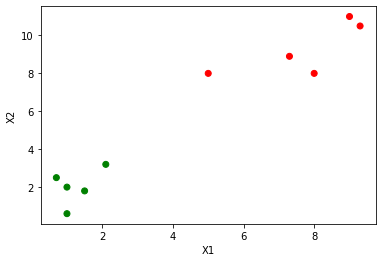

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
colors= ['red' if i == 1 else 'green' for i in y]
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(x1,x2,c=colors)

By looking at the visualization of our data, we can clearly see that it is seperable by a diagonal line. This means that our data is linearly seperable. One way we can seperate this data is by plotting the line $x_{2}=8-\frac{4}{3} x_{1}$. I'm going to do this with the help of the numpy library [4].

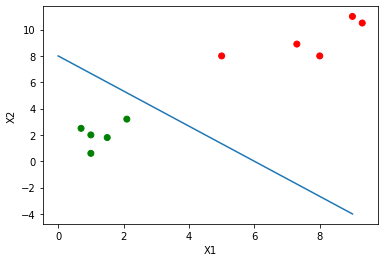

In [6]:
import numpy as np
x_l = np.array(range(10))
y_l = 8 - (4/3)*x_l

plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(x1,x2,c=colors)
plt.plot(x_l,y_l)

We can see in the above figure that our line indeed seperates our data. Theoretically, however, there are infinite lines that we can plot which seperate this data. The SVM method finds the most ideal hyperplane (line in the case of 2D) which seperates the data based on the margin to the support vectors (refer to section 1.1). So let's try seperating our data using the SVM method. We are going to use the SVC function introducted earlier, but because we are implementing a linear SVM, we will specify our kernel value as linear. The rest of the parameters will remain as default for now.

In [7]:
svmModel = svm.SVC(kernel='linear')

Now that we have our SVM model, we can train it using the "fit" function associated with this class. the fit function takes two inputs, $X$ and $Y$, corresponding to the input and output data respectively. So first, we have to combine our input data into one matrix using the "asmatrix" function from numpy.

In [8]:
X = np.asmatrix( [x1,x2] )
print(X.shape)

(2, 10)


Now our input data, $X$, is a $2 \times 10$ matrix. However, the majority of machine learning libraries in python, including Scikit learn, define the input data as (samples, features). As a result, we will have to transpose our input matrix to get our input data in the correct format.

In [9]:
X = np.transpose(X)
print(X.shape)

(10, 2)


Now that our data is in the correct format, we can use the "fit" function to train our SVM model.

In [10]:
svmModel.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Now that our SVM model is trained, we can extract the parameters, or the coefficients, of the SVM as follows.

In [11]:
intercept = svmModel.intercept_   #This is the "y-intercept" of our SVM hyperplane (line)
w = svmModel.coef_ [0]  #Here, w is a vector containing the coefficients of the SVM hyperplane

print(intercept)
print(w)

[-2.36406975]
[0.1844197 0.3052464]


Based on the above output, we can see that the intercept, $w_0 = -2.364$ and our coefficients are $w_1 = 0.1844$ and $w_2 = 0.3052$. This means that the predicted output of our SVM, $y_{predict}$ is:

$$
y_{\text {predict}}=w_{0}+w_{1} x_{1}+w_{2} x_{2}
$$

Where $x_1$ is the first feature and $x_2$ is the second feature of our input data. Since this is a two-dimensional problem, our SVM hyperplane is actually a line whose slope can be calculated as:

$$
\text {slope}=m= -\frac{w_{1}}{w_{2}}
$$

And the y-axis intercept, in this case the $x_2$ intercept, is calculated as from the SVM hyperplane intercept as:

$$
x_{2} \text { intercept }=b=-\frac{w_{0}}{w_{2}}
$$

Now we can plot our SVM line by plotting the function $y=m x+b$ where $y$ is on the $x_2$ axis and $x$ is on the $x_1$ axis.

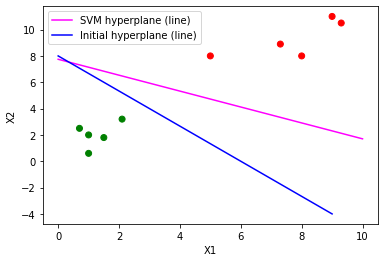

In [12]:
m = - w[0]/w[1]
b = -(intercept/w[1])

#Creating arrays to plot the SVM line
SVMline_X = np.linspace(0,10)
SVMline_Y = m*SVMline_X + b

#Plotting our SVM hyperplane with the data
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(x1,x2, c=colors)
plt.plot(SVMline_X,SVMline_Y, color = "magenta", label = "SVM hyperplane (line)")
plt.plot(x_l,y_l, color = "blue", label = "Initial hyperplane (line)")
plt.legend()

We can clearly see in the above plot that the SVM method produces a different line than what we proposed originally. This is because the SVM finds the ideal line (or hyperplane) that is an equal distance from the support vectors (the closest points of opposing labels). Let's see what these support vectors are!

In [13]:
support_vectors = svmModel.support_vectors_
print(support_vectors)

[[2.1 3.2]
 [5.  8. ]]


This means that the support vectors in this case are:

$v_{1}=\left[\begin{array}{l}{2.1} \\ {3.2}\end{array}\right]$   and       $v_{2}=\left[\begin{array}{l}{5} \\ {8}\end{array}\right]$.

This makes sense because the support vectors are the closest vectors (or data points) to the hyperplane that seperates the classes. And we can see from the graph below that the support vectors (marked with orange X) are indeed the closest points to the SVM hyperplane.

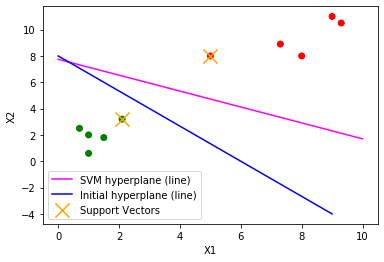

In [14]:
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(x1,x2, c=colors)
plt.plot(SVMline_X,SVMline_Y, color = "magenta", label = "SVM hyperplane (line)")
plt.plot(x_l,y_l, color = "blue", label = "Initial hyperplane (line)")
plt.scatter(support_vectors.transpose()[0],support_vectors.transpose()[1], color="orange", marker = "x", s = 200, label = "Support Vectors")
plt.legend()

Now that we have developed the SVM for this problem, we can test our classifier on new data. Based on the visual above, we know that a datapoint at (2,2) will be classified as 0 (green) and point (10,10) will be classified as 1 (red) based on the hyperplane that seperates our data. To test this, we can use the predict function from the Scikit learn library.

In [15]:
X_test = np.array( [[2,2] , [10,10]])
y_pred = svmModel.predict(X_test)
print(y_pred)

[0 1]


As can be seen by the output above, our SVM model predicted the data correctly. An alternative way to test the SVM model, especially when testing on large datasets, is to use the score function. This score function compares the predicted output to the real output to calculate the accuracy of the model.

In [16]:
y_true = [0, 1] #True labels associated with X_test
accuracy = svmModel.score(X_test,y_true)
print("Accuracy = ", accuracy)

Accuracy =  1.0


Based on the above output, we can see that our SVM classified our test data correctly with 100% accuracy!

Next, we will look at a more complex application of SVM using non-linear data.

### 2.2 SVM for Cyber Threat Detection

In this demonstration of non-linear SVM, we will consider the application of attack detection in power systems. Since we are done with the previous example, I will clear the defined variables to avoid confusion and errors and re-import the libaries we've been using.

In [17]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

Before we begin, here's a quick background to this problem.

#### 2.2.1 Background

Today's power systems consist of networked architecture to allow for more efficient power generation and use of multiple (potentially green) sources of energy. This networked architecture, however, is vulnerable to cyber attacks. Many cyber attacks today are designed in a stealthy manner that is capable of bypassing the "bad data detection" methods employed in most power system. This is because the current methods involve mathematical modelling of measurements through state estimation. Therefore, many researchers propose security methods that involve machine learning and intelligent algorithms. In this tutorial, we will explore the ability of SVM to detect the presence of a cyber attack by using various measurements of the power system as features.

#### 2.2.2 Data

The data used for this tutorial is generated by Oak Ridge National Laboratories (ORNL) [5]. We will be using the first power system dataset shared on their website. For convenience, I have uploaded this dataset into my github repository so we can load it in this notebook without external dependencies.

In [18]:
dataURL = 'https://raw.githubusercontent.com/jsakhnin-ai/IEEE_DATA/master/ICSdata.csv'

We use the pandas library, which is a great tool for reading/writing data, to the read the csv file directly from the above URLs.

In [19]:
import pandas as pd #Used to read files
data = pd.read_csv(dataURL)

Now our data is in a dataframe object. We can use the "head" function associated with the dataframe object to see the first 5 rows (not including the headers).

In [20]:
data.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,Natural
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,Natural
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,Natural


As we can see, the data contains 129 features (measurements) which are each labelled with a header indicating each measurement. We can also use the "tail" function to see the last 5 rows of our data.

In [21]:
data.tail()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
4961,28.229631,130882.4694,-91.730543,130882.4694,148.264289,130957.6892,25.553918,459.42299,-95.683952,466.93050,...,0,0,0,0,0,0,0,0,0,Natural
4962,28.195253,130957.6892,-91.770650,130932.6159,148.224182,131032.9090,25.267439,460.70476,-95.752707,467.66294,...,0,0,0,0,0,0,0,0,0,Natural
4963,28.000447,131057.9823,-91.971185,131057.9823,148.035105,131133.2021,24.316329,464.36696,-96.251180,468.94471,...,0,0,0,0,0,0,0,0,0,Natural
4964,27.971800,131083.0556,-91.994104,131057.9823,148.006458,131133.2021,24.259033,464.18385,-96.314205,469.12782,...,0,0,0,0,0,0,0,0,0,Natural
4965,27.931693,131083.0556,-92.034211,131057.9823,147.966351,131133.2021,24.241844,464.00074,-96.342853,469.12782,...,0,0,0,0,0,0,0,0,0,Natural


Since the last column of our data, labeled "marker", is our label, we will assin it to a different variable, and drop that column from our data.

In [22]:
labels = data['marker']
data = data.drop('marker', axis=1)

#### 2.2.3 Data Processing

Processing of data is necessary prior to using machine learning algorithm. It is important to consider errors in the measurement or unknown values. A good example of this is having infinity values in the data. To do this check, we will use the numpy library.

In [23]:
from numpy import inf
np.where(data==inf)

(array([ 738,  739,  753,  777,  778,  779,  780,  798,  799,  800,  812,
         834,  835,  847,  864,  865,  866,  887,  888,  901,  916,  928,
         939,  940,  971,  972, 1038, 1073, 1074, 1075, 1093, 1094, 1119,
        1120, 1121, 1151, 1152, 1153, 1349, 1350, 1351, 1352, 1384, 1385,
        1417, 1418, 1445, 1498, 1499, 1500, 1527, 1528, 1557, 1558, 1583,
        1584, 1608, 1609, 1666, 1667, 1697, 1698, 1721, 1751, 1752, 1753,
        1754, 1794, 1795, 1832, 1833, 1833, 1833, 1833, 1863, 1863, 1863,
        1863, 1864, 1864, 1864, 1864, 1865, 1866, 1901, 1901, 1901, 1901,
        1902, 1902, 1902, 1902, 1903, 1903, 1903, 1903, 1933, 1933, 1933,
        1933, 1934, 1934, 1934, 1934, 1964, 1964, 1964, 1964, 1965, 1965,
        1965, 1965, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2003,
        2003, 2003, 2003, 2031, 2031, 2031, 2031, 2032, 2032, 2032, 2032,
        2033, 2033, 2033, 2033, 2034, 2034, 2034, 2034, 2070, 2070, 2070,
        2070, 2109, 2109, 2109, 2109, 

The above output tells us the location in the dataset where the value is inifnity. The first array corresponds to rows and the second correspond to columns. For example, the first infinity value is in row 738 and column 26:

In [24]:
data.to_numpy()[738][26]

inf

Since the infinity values are likely from recording or computational errors, we will replace these values with 0.

In [25]:
data = data.replace(-inf, 0)
data = data.replace(inf, 0)

Now that we removed problematic infinite values from our data, the next step is to remove zero columns or useless features from our dataset. This data, in fact, contains several zero columns corresponding to log data that was not recorded. An example of this is the control panel log data:

In [26]:
print("mean = ", data['control_panel_log1'].mean() )
print("Standard deviation = ", data['control_panel_log1'].std() )

mean =  0.0
Standard deviation =  0.0


A mean and standard deviation of zero tells us that the "control_panel_log1" column is all zeros. Performing a similar check on every column (potentially through a loop) yields in 12 zero columns. Let's remove these zero columns from our data to increase the computational efficiency and performance of the SVM.

In [27]:
data = data.drop(['snort_log1','snort_log2','snort_log3','snort_log4',
                'control_panel_log1','control_panel_log2','control_panel_log3','control_panel_log4',
                'relay1_log','relay2_log','relay3_log','relay4_log'], axis=1) 

Next, we note that the labels are identified by a string containing "Attack" or "Natural":

In [28]:
labels.unique()

array(['Natural', 'Attack'], dtype=object)

We convert these labels to binary values for convenience:

In [29]:
labels = labels.replace('Attack', 1)
labels = labels.replace('Natural', 0)
labels.unique()

array([0, 1], dtype=int64)

Now that our data is clean, the last thing to do is to scale the data. Scaling the data is essentially changing the range of the data without affecting the distribution of the data. This is critical for algorithms, like the SVM, which function based on differences among data points. Scaling is helpful in increasing the computational efficiency of machine learning algorithms. To scale our data, we will use preprocessing library from Scikit learn.

In [30]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
data = scalar.fit_transform(data)

We are almost ready to begin training our SVM! But first, we will convert our data to numpy arrays for easy processing.

In [31]:
X = np.asarray(data)
y =  np.asarray(labels)

Now that our data and labels are in the correct format, we are ready to start implementing the SVM classifier. But before we begin to train our SVM, we must consider a method in which we can test it. Since we need to know how well our SVM performs on unseen data, it is important to divide the data we have into training and testing data. Luckily, Scikit learn makes this very easy using one simple function called "test_train_split".

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

The above code split our data into training and testing data in a 7-3 split where the training data and testing data account for 70% and 30% of the data respectively. 

In [33]:
print("Size of training data: " , X_train.shape)
print("Size of training labels: " , y_train.shape)
print("Size of testing data: " , X_test.shape)
print("Size of testing labels: " , y_test.shape)

Size of training data:  (3476, 116)
Size of training labels:  (3476,)
Size of testing data:  (1490, 116)
Size of testing labels:  (1490,)


Another advantage of this "test_train_split" function is that it automatically shuffels our data so we have an even distribution in both training and testing data. This is very important because the data we have is sorted by class (label). We can confirm this by plotting either the training or testing labels. It is important to make sure that the training and testing data contain samples associate with all the labels we are trying to classify.

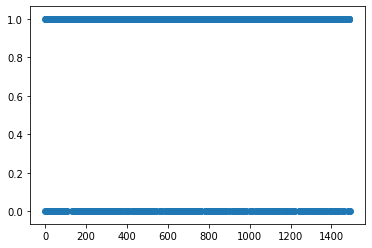

In [34]:
plt.scatter(range(y_test.shape[0]), y_test)

#### 2.2.4 Attack Detection using SVM

Similarly to section 2.1, we begin by creating a classifier object. Let's start by trying the exact same model as section 2.1.

In [35]:
svmModel = svm.SVC(kernel='linear')

Now let's train this SVM model on our training data, then test it on the testing data, similarly to what was done in section 2.1.

In [36]:
svmModel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Now that our model is trained on the training data, we can test its accuracy on the testing data.

In [37]:
accuracy = svmModel.score(X_test,y_test)
print(accuracy)

0.7885906040268457


We have an accuracy of 78%! *(value may vary slightly with every run)* But up until now, we have been using the default parameter. As discussed in section 1, the regularization parameter, $C$, affects the tolerance of miss-classification. For larger values of C, the algorithm will choose a smaller-margin hyperplane if that hyperplane better classifies the data. This means that increasing the C value might increase the accuracy of our model. But how much do we increase it by? What is an ideal value of C? Such questions are typically answered with experimental testing. One thing we can do is create a loop in which the SVM is trained with different C values. The default C value is 1, let's try testing other values of C. We will also track the time it takes to train for each value of C because computational efficiency is important.

**Warning: The below code might take up to few minutes to execute**

In [38]:
import time
cValues = [0.1,10,100]

for c in cValues:
    svmModel = svm.SVC(kernel = 'linear', C=c)
    time1 = time.time()
    svmModel.fit(X_train,y_train)
    time2 = time.time()
    print( "C value = {}, Accuracy = {}, Training Time = {} seconds".format( c, svmModel.score(X_test,y_test), time2-time1) )

C value = 0.1, Accuracy = 0.7899328859060403, Training Time = 0.9470846652984619 seconds
C value = 10, Accuracy = 0.7865771812080536, Training Time = 5.237265348434448 seconds
C value = 100, Accuracy = 0.7953020134228188, Training Time = 39.285279512405396 seconds


As we can see from the results above, changing our $C$ value had very little effect on the accuracy, in fact, higher $C$ values significantly increased the training time thereby reducing the computational efficiency of our classifier. So how can we further increase the accuracy of our model?
Recall that up until now, we used a linear kernel in the SVM. As explained in section 1, kernels are a useful tool that can help the SVM seperate the data in a non-linear fashion. A very popular and common kernel is the Radial Basis Function (RBF) kernel. The RBF kernel on two samples, $x$ and $x^{\prime}$, are represented as feature vectors in some input space defined as:

\begin{equation}
K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\exp \left(-\frac{\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^{2}}{2 \sigma^{2}}\right)
\end{equation}

where $\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^{2}$ is the squared euclidean distance, and $\sigma$ is a parameter. An alternative way of writing this, which is more relevant to the Scikit learn implementation, is as follows:

\begin{equation}
K\left(\mathbf{x}, \mathbf{x}^{\prime}\right)=\exp \left(-\gamma\left\|\mathbf{x}-\mathbf{x}^{\prime}\right\|^{2}\right)
\end{equation}

where $\gamma=\frac{1}{2 \sigma^{2}}$ is known as the kernel parameter ('gamma' in sklearn).

So let's try using the RBF kernel! For now, we will  arbitrarily choose $C = 1$ and $\gamma = 0.1$.

In [39]:
svmModel = svm.SVC(kernel = 'rbf', C=1, gamma = 0.1)
svmModel.fit(X_train,y_train)
accuracy = svmModel.score(X_test,y_test)
print(accuracy)

0.8536912751677852


We can see that our accuracy improved when using the RBF kernel. This is likely due to the fact that our data is not linearly seperable. Using a kernel allows the SVM to analyze our data in a different space and thus is capable of finding a hyperplane that better seperates our data. 

#### 2.2.5 Cross-Validation and Parameter Optimization

The next thing to consider is the modification of the $C$ and $\gamma$ parameters. We can, once again, run a loop in which the SVM is tested under various parameters but this can be very time consuming. Luckily, there are algorithms such as the *Grid Search* algorithm which is used to search for the ideal parameters of machine learning algorithms. The grid search algorithm divides the data into a number of subsets, each of the subsets is divided into training and validation, then trains the machine learning algorithm on the training part of the subset and tests it on the validation part. The performance of the algorithm in each of the subsets is averaged and the results for each set of parameters are compared.
In python, this can be easily implemented using the Scikit learn library.

To implement the grid search algorithm, we can use GridSearchCV object from sklearn library which takes the classfier object (our SVM model), a grid of parameters, a scoring methods, and the number of subsets to divide the data into. In the below code, we will implement the grid search using 5 folds to test for three different $C$ values and three different $\gamma\$ values; in other words, a grid of 3x3 = 9 different SVM models.

**Warning: The below code might take (up to) a few minutes to execute**

In [40]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

gs = GridSearchCV(estimator=svm.SVC(kernel = 'rbf'),
                     param_grid=parameter_grid,
                     scoring='accuracy',
                     cv=5)

gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Now that our grid search is complete, we can view the resultant best parameters and the resultant score (accuracy) associated with these parameters.

In [41]:
best_parameters = gs.best_params_
best_score = gs.best_score_
print(best_parameters)
print(best_score)

{'C': 10, 'gamma': 1}
0.9159953970080552


And we achived an accuracy of 92%! *(value may vary slightly with every run)* This is a significant improvement over the accuracies we attained with previous models. For further testing, we can train an SVM model with these parameters on all of the $X_{train}$ data and then test it on our testing data, $X_{test}$

In [42]:
svmModel = svm.SVC(kernel = 'rbf', C=10, gamma = 1)
svmModel.fit(X_train,y_train)
accuracy = svmModel.score(X_test,y_test)
print("The accuracy of the SVM model = ", accuracy)

The accuracy of the SVM model =  0.9281879194630872


We began with 77% accuracy and now we have a model that is 93% accurate! *(values may vary slightly with every run)* This demonstrates the importance of parameter tuning and its effect on the performance of machine learning algorithms.

## 3.0 Conclusion

In this tutorial, we established the fundemental theory of Support Vector Machines (SVM), we demonstrated this theory through a basic linear example, then explored a more sophisticated application of SVM involving cyber-attack detection in power systems. We then concluded that Support Vector Machines, much like most classification algorithms, are optimized through cross-validation of varying hyper-parameters. This was demonstrated by modifying the regularization parameter, $C$, and the kernel coefficient, $\gamma$, such that the classification accuracy on unseen data is maximized. The final results show that SVM was successful in this application. It is also worth noting that while most developers tend to diverge towards deep learning techniques for solving such problems, in some cases a simple classifier such as the SVM can be just as successful and even more benefitial than deep neural networks. In certain cases, some classifiers can achieve similar performance with less time than deep neural networks. Therefore, it is crucial for any machine learning developer to be fimiliar with the various classification methods, as well as their benefits and drawbacks, to solve problems in the most efficient manner.

## References

[1] S. Sayad, “Support Vector Machine.” [Online]. Available: https://www.saedsayad.com/support_vector_machine.htm. [Accessed: 02-Nov-2019].

[2] M. P. Deisenroth, A. A. Faisal, and C. S. Ong, “Mathematics for Machine Learning,” p. 417.

[3] Fabian Pedregosa, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, Peter Prettenhofer, Ron Weiss, Vincent Dubourg, Jake Vanderplas, Alexandre Passos, David Cournapeau, Matthieu Brucher, Matthieu Perrot, Édouard Duchesnay. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, 2825-2830 (2011) 

[4] S. van der Walt, S. Chris Colbert and G. Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011)

[5] Beaver, Justin M., Borges-Hink, Raymond C., Buckner, Mark A., "An Evaluation of Machine Learning Methods to Detect Malicious SCADA Communications," in the Proceedings of 2013 12th International Conference on Machine Learning and Applications (ICMLA), vol.2, pp.54-59, 2013.